<a href="https://colab.research.google.com/github/Arya-Raj/Data-analysis-and-visualization-of-Covid/blob/main/Forecasting_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
df1=pd.DataFrame(pd.read_csv(r'/content/8th jan 2021.csv'))

In [ ]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10670 entries, 0 to 10669
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10670 non-null  object 
 1   State         10670 non-null  object 
 2   Confirmed     10670 non-null  int64  
 3   Recovered     10670 non-null  int64  
 4   Deceased      10670 non-null  int64  
 5   Tested        9524 non-null   float64
 6   Active Cases  10670 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 583.6+ KB


,Date,State,Confirmed,Recovered,Deceased,Tested,Active Cases
0,30-01-2020,Kerala,1,0,0,NaN,1
1,30-01-2020,India,1,0,0,NaN,1
2,02-02-2020,Kerala,2,0,0,NaN,2
3,02-02-2020,India,2,0,0,NaN,2
4,03-02-2020,Kerala,3,0,0,NaN,3
...,...,...,...,...,...,...,...
10665,08-01-2021,Tripura,33296,32829,385,588991.0,82
10666,08-01-2021,India,10432526,10055935,150835,179336364.0,225756
10667,08-01-2021,Uttar Pradesh,591610,571606,8469,25034039.0,11535
10668,08-01-2021,Uttarakhand,93111,87127,1562,1881487.0,4422


In [ ]:
df1['Date']=pd.to_datetime(df1['Date'],format='%d-%m-%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10670 entries, 0 to 10669
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10670 non-null  datetime64[ns]
 1   State         10670 non-null  object        
 2   Confirmed     10670 non-null  int64         
 3   Recovered     10670 non-null  int64         
 4   Deceased      10670 non-null  int64         
 5   Tested        9524 non-null   float64       
 6   Active Cases  10670 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 583.6+ KB


In [ ]:
#To find the unique states
states=df1['State'].unique()
print(states)

['Kerala' 'India' 'Delhi' 'Telangana' 'Rajasthan' 'Haryana'
 'Uttar Pradesh' 'Ladakh' 'Tamil Nadu' 'Jammu and Kashmir' 'Karnataka'
 'Maharashtra' 'Punjab' 'Andhra Pradesh' 'Himachal Pradesh' 'Uttarakhand'
 'Odisha' 'Puducherry' 'West Bengal' 'Chandigarh' 'Chhattisgarh' 'Gujarat'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Goa' 'Mizoram'
 'Andaman and Nicobar Islands' 'Assam' 'Jharkhand' 'Arunachal Pradesh'
 'Nagaland' 'Tripura' 'Dadra and Nagar Haveli and Daman and Diu'
 'Meghalaya' 'Sikkim']


In [ ]:
df1.reset_index().set_index("Date")

,index,State,Confirmed,Recovered,Deceased,Tested,Active Cases
Date,,,,,,,
2020-01-30,0,Kerala,1,0,0,NaN,1
2020-01-30,1,India,1,0,0,NaN,1
2020-02-02,2,Kerala,2,0,0,NaN,2
2020-02-02,3,India,2,0,0,NaN,2
2020-02-03,4,Kerala,3,0,0,NaN,3
...,...,...,...,...,...,...,...
2021-01-08,10665,Tripura,33296,32829,385,588991.0,82
2021-01-08,10666,India,10432526,10055935,150835,179336364.0,225756
2021-01-08,10667,Uttar Pradesh,591610,571606,8469,25034039.0,11535


In [ ]:
#Extracting data of each state from the main dataframe and saving it as a seperate dataframe as an element of the set S(cumulative) and d[daily]

s={}
d={}
for i in states:
  s[i]=pd.DataFrame()
  d[i]=pd.DataFrame()
  s[i]=df1[df1["State"]==i]
  d[i]=s[i].reset_index().set_index("Date")
  d[i]=d[i].drop(columns='State')                 
  d[i]=d[i].diff()                                #finding the difference to make it a daily data 
  d[i]=d[i][1:]

# **AR MODEL**

In [ ]:
df=pd.DataFrame()

In [ ]:
#Extracting only the date and confirmed cases
df['x']=s['Kerala']['Date']
df['y']=s['Kerala']['Confirmed']
df

,x,y
0,2020-01-30,1
2,2020-02-02,2
4,2020-02-03,3
6,2020-02-14,3
9,2020-03-02,3
...,...,...
10506,2021-01-04,778874
10542,2021-01-05,784489
10578,2021-01-06,790883
10614,2021-01-07,795934


In [ ]:
#Setting the index and saving it into another dataframe
df3=df.reset_index().set_index('x')


In [ ]:
#Dropping the index column
df3=df3.drop(['index'],axis=1)


In [ ]:
df3

,y
x,
2020-01-30,1
2020-02-02,2
2020-02-03,3
2020-02-14,3
2020-03-02,3
...,...
2021-01-04,778874
2021-01-05,784489
2021-01-06,790883


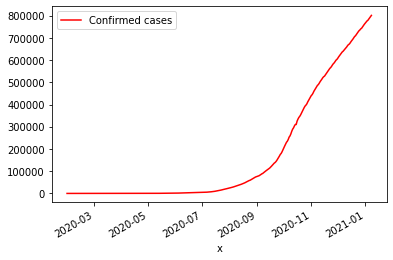

In [ ]:
ax=df3.plot(legend=True,c='r')
ax.legend(['Confirmed cases'])

# **AR(0)**

In [ ]:
x=df3.values
x.size

317

In [ ]:
from statsmodels.tsa.ar_model import AR 
from sklearn.metrics import mean_squared_error
trc=x[0:308]
tec=x[306:]
m=AR(trc)
m_f=m.fit()
prec=m_f.predict(start=306,end=316)

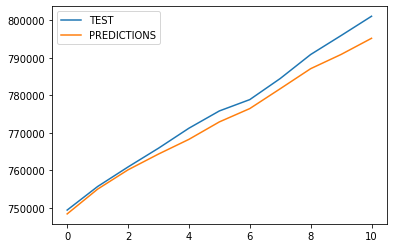

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[306:],label="TEST")
plt.plot(prec,label="PREDICTIONS")
plt.legend()

In [ ]:
from sklearn.metrics import explained_variance_score
acc=explained_variance_score(x[306:],prec)
print(acc*100)
l=pd.DataFrame(columns=["Date","Original","Predicted",'Difference'])
l["Date"]=[i for i in df['x'][306:]]
l["Original"]=x[306:]
l["Predicted"]=prec
l["Difference"]=l["Predicted"]-l["Original"]
l


98.96975632100288


,Date,Original,Predicted,Difference
0,2020-12-29,749451,748426.609377,-1024.390623
1,2020-12-30,755719,755023.704063,-695.295937
2,2020-12-31,760934,760169.928826,-764.071174
3,2021-01-01,765925,764369.655731,-1555.344269
4,2021-01-02,771253,768287.343946,-2965.656054
5,2021-01-03,775853,772936.461045,-2916.538955
6,2021-01-04,778874,776485.716697,-2388.283303
7,2021-01-05,784489,781768.044411,-2720.955589
8,2021-01-06,790883,787109.475575,-3773.524425
9,2021-01-07,795934,790900.634816,-5033.365184


In [ ]:
RMS={'AR(0)':(((l['Predicted']-l['Original'])**2).mean())**0.5}
RMS

{'AR(0)': 3148.1197121905498}

# HES

In [ ]:
import statsmodels.tsa.holtwinters as ets


In [ ]:
train=s['Kerala']['Confirmed'][:306].values
test=s['Kerala']['Confirmed'][306:].values

In [ ]:
holt_model=ets.ExponentialSmoothing(train,trend='additive',damped=False,seasonal=None).fit()

In [ ]:
forecast=holt_model.forecast(steps=11)

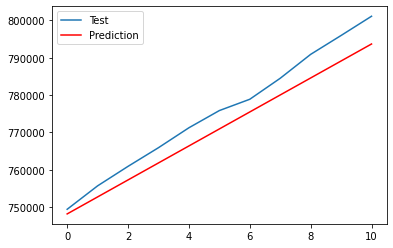

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(test)
#plt.plot(forecast,color='red')
plt.plot(test,label='Test')
plt.plot(forecast,label='Prediction',color='red')
plt.legend()

In [ ]:
l=pd.DataFrame()
l['Date']=s['Kerala']['Date'][306:]
l['Confirmed']=test
l['Predicted']=forecast
l['Difference']=l['Predicted']-l['Confirmed']
l

,Date,Confirmed,Predicted,Difference
10290,2020-12-29,749451,748213.621999,-1237.378001
10326,2020-12-30,755719,752758.025555,-2960.974445
10362,2020-12-31,760934,757302.429110,-3631.570890
10398,2021-01-01,765925,761846.832666,-4078.167334
10434,2021-01-02,771253,766391.236221,-4861.763779
10470,2021-01-03,775853,770935.639777,-4917.360223
10506,2021-01-04,778874,775480.043333,-3393.956667
10542,2021-01-05,784489,780024.446888,-4464.553112
10578,2021-01-06,790883,784568.850444,-6314.149556
10614,2021-01-07,795934,789113.253999,-6820.746001


In [ ]:
print((((forecast-test)**2).mean())**0.5)

4869.286396509914


# **De-Trending**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



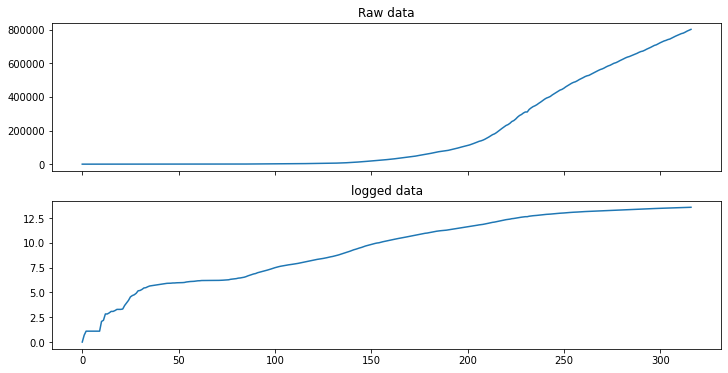

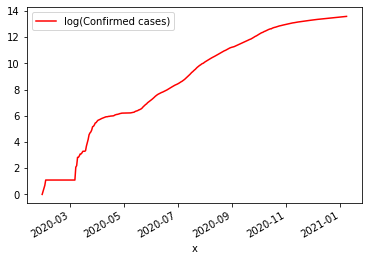

In [ ]:


fig, ax = plt.subplots(2, sharex=True, figsize=(12,6))
ax[0].plot(df3.values);
ax[0].set_title("Raw data");
ax[1].plot(np.log(df3.values));
ax[1].set_title("logged data")
plt.show()
m=np.log(df3)
ax=m.plot(legend=True,c='r')
ax.legend(['log(Confirmed cases)'])

In [ ]:
#KPSS to check the stationarity
from statsmodels.tsa.stattools import kpss

print(" > Is the data stationary ?")
dftest = kpss(np.log(df3.values), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.240
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


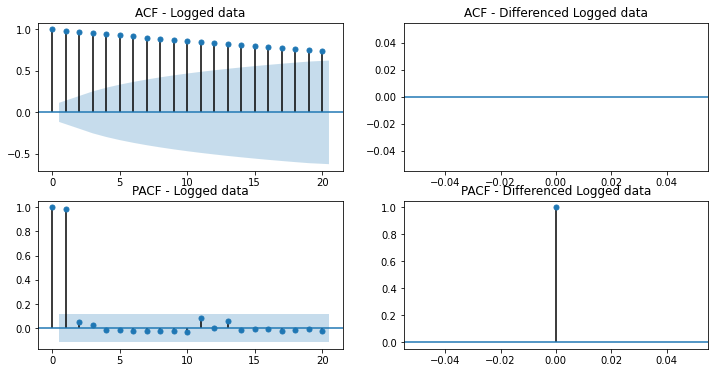

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 2, figsize=(12,6))
first_diff = (np.log(df3.values)- np.log((df3.shift(30)).values))
ax[0,0] = plot_acf(np.log(df3.values), ax=ax[0,0], lags=20, title="ACF - Logged data")
ax[1, 0] = plot_pacf(np.log(df3.values), ax=ax[1, 0], lags=20, title="PACF - Logged data")
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=20, title="ACF - Differenced Logged data")
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=20, title="PACF - Differenced Logged data")


84.10944541647585


,Date,Original,Predicted,Difference
0,2020-12-03,620050.0,619539.349044,-510.650956
1,2020-12-04,625768.0,624655.616558,-1112.383442
2,2020-12-05,631616.0,631213.261908,-402.738092
3,2020-12-06,636393.0,637447.103791,1054.103791
4,2020-12-07,639665.0,643424.764361,3759.764361
5,2020-12-08,644697.0,650645.108153,5948.108153
6,2020-12-09,649572.0,657902.345589,8330.345589
7,2020-12-10,654042.0,664676.995531,10634.995531
8,2020-12-11,658684.0,672098.339564,13414.339564
9,2020-12-12,664633.0,679483.438968,14850.438968


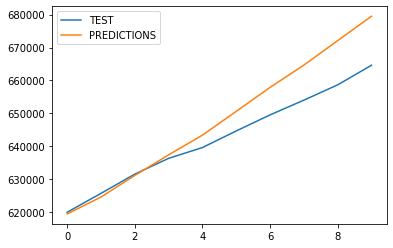

In [ ]:
import math
x_log_=np.log(df3.values)
from statsmodels.tsa.ar_model import AR 
from sklearn.metrics import mean_squared_error
trc=x_log_[0:280]
tec=x_log_[280:]
m=AR(trc)
m_f=m.fit()
prec=m_f.predict(start=280,end=289)
from sklearn.metrics import explained_variance_score
acc=explained_variance_score(x_log_[280:],prec)
print(acc*100)
l=pd.DataFrame(columns=["Date","Original","Predicted",'Difference'])
l["Date"]=[i for i in df['x'][280:290]]
l["Original"]=[math.exp(x_log_[i]) for i in range(280,290)]
l["Predicted"]=[math.exp(prec[i]) for i in range(0,10)]
l["Difference"]=l["Predicted"]-l["Original"]
plt.plot(l["Original"],label="TEST")
plt.plot(l["Predicted"],label="PREDICTIONS")
plt.legend()
l

In [ ]:
RMS={'AR(0)':(((l['Predicted']-l['Original'])**2).mean())**0.5}
RMS

{'AR(0)': 7970.352211612811}

94.43143819736233


,Date,Original,Predicted,Difference
0,2020-10-18,295133.0,299299.132162,4166.132162
1,2020-10-19,303897.0,305290.029946,1393.029946
2,2020-10-20,310141.0,313725.468516,3584.468516
3,2020-10-21,310141.0,314618.809123,4477.809123
4,2020-10-22,325213.0,314898.840335,-10314.159665
5,2020-10-23,334229.0,337521.879082,3292.879082
6,2020-10-24,341860.0,338180.882878,-3679.117122
7,2020-10-25,346882.0,355797.182659,8915.182659
8,2020-10-26,353473.0,353651.342907,178.342907
9,2020-10-27,361842.0,358881.771416,-2960.228584


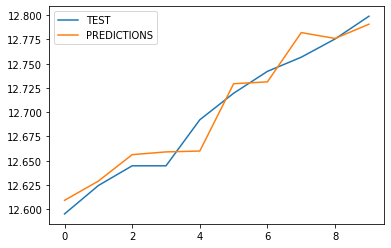

In [ ]:
df3_diff=df3.shift(6)
x_log=np.log(df3_diff.values)
x_log=x_log[6:]
from statsmodels.tsa.ar_model import AR 
from sklearn.metrics import mean_squared_error
trc=x_log[0:238]
tec=x_log[238:]
m=AR(trc)
m_f=m.fit()
prec=m_f.predict(start=228,end=237)
import matplotlib.pyplot as plt
plt.plot(x_log[228:],label="TEST")
plt.plot(prec,label="PREDICTIONS")
plt.legend()
from sklearn.metrics import explained_variance_score
acc=explained_variance_score(x_log[228:],prec)
print(acc*100)
l=pd.DataFrame(columns=["Date","Original","Predicted",'Difference'])
l["Date"]=[i for i in df['x'][234:]]
l["Original"]=[math.exp(x_log[i]) for i in range(228,238)]
l["Predicted"]=[math.exp(prec[i]) for i in range(0,10)]
l["Difference"]=l["Predicted"]-l["Original"]
l

In [ ]:
RMS['AR(6)']=(((l['Predicted']-l['Original'])**2).mean())**0.5
RMS

{'AR(0)': 3582.737051181442, 'AR(6)': 5207.998320497024}

# ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))

In [ ]:
k=pd.DataFrame()
k['Confirmed']=s['Kerala']['Confirmed']
k['Date']=s['Kerala']['Date']
k=k.reset_index().set_index('Date')
import math
k_log=[]
for i in k['Confirmed']:
  k_log.append(math.log(i))

In [ ]:
train=k_log[250:306]
test=k_log[306:]

In [ ]:
model_arima = ARIMA(train,order=(6, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
predictions= model_arima_fit.forecast(steps=11)[0]
predictions

-537.0914004430609


array([13.52487169, 13.53241159, 13.54017489, 13.54623098, 13.5524207 ,
       13.55849386, 13.5637188 , 13.56957178, 13.57723632, 13.58484947,
       13.59133902])

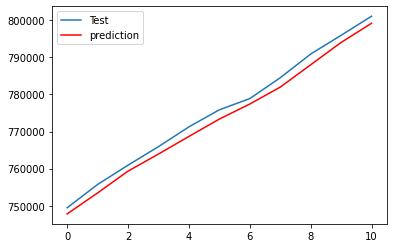

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(test)
#plt.plot(predictions,color='red')
plt.plot([math.exp(i) for i in test],label="Test")
plt.plot([math.exp(i) for i in predictions],label="prediction",color='red')
plt.legend()

In [ ]:
print((((predictions-test)**2).mean())**0.5)

0.18034191701858218


2166.5190068366865


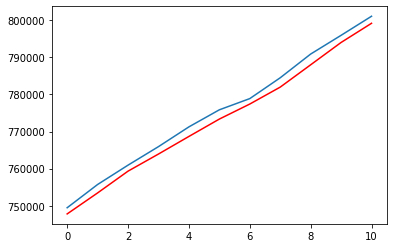

In [ ]:
d_log_test=[]
d_log_pre=[]
for i in test:
  d_log_test.append(math.exp(i))
for i in predictions:
  d_log_pre.append(math.exp(i))
import matplotlib.pyplot as plt
plt.plot(d_log_test)
plt.plot(d_log_pre,color='red')
import numpy as np
pre=np.array(d_log_pre)
te=np.array(d_log_test)
print((((pre-te)**2).mean())**0.5)

In [ ]:
l=pd.DataFrame()
l['Date']=s['Kerala']['Date'][270:]
l['Confirmed']=s['Kerala']['Confirmed'][270:]
l['Predicted']=pre
l['Difference']=te-pre
l

,Date,Confirmed,Predicted,Difference
8994,2020-11-23,566453,565204.949727,1248.050273
9030,2020-11-24,571873,567314.068872,4558.931128
9066,2020-11-25,578364,569018.805839,9345.194161
9102,2020-11-26,583742,570315.473414,13426.526586
9138,2020-11-27,587708,571201.262055,16506.737945
9174,2020-11-28,593958,571674.250034,22283.749966
9210,2020-11-29,599601,571733.410382,27867.589618
9246,2020-11-30,602983,571378.614609,31604.385391
9282,2020-12-01,608358,570610.633166,37747.366834
9318,2020-12-02,614674,569431.132657,45242.867343


# **HES(log)**

0.021495639764639283


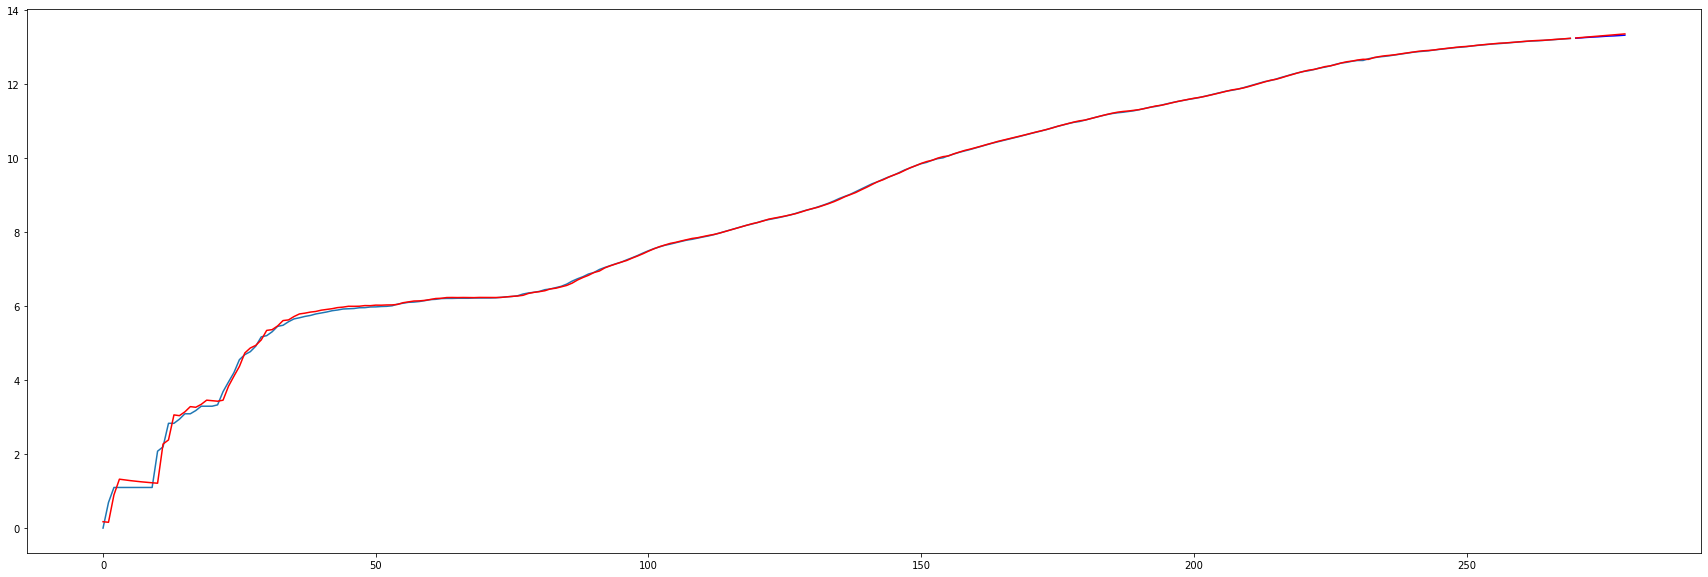

In [ ]:
import statsmodels.tsa.holtwinters as ets
k=pd.DataFrame()
k['Confirmed']=s['Kerala']['Confirmed']
k['Date']=s['Kerala']['Date']
k=k.reset_index().set_index('Date')
import math
k_log=[]
for i in k['Confirmed']:
  k_log.append(math.log(i))
train=k_log[:270]
test=k_log[270:]
holt_model=ets.ExponentialSmoothing(train,trend='additive',damped=False,seasonal=None).fit()
forecast=holt_model.forecast(steps=10)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(train)
plt.plot(holt_model.fittedvalues,color='red')
plt.plot(range(270,280),test,color='blue')
plt.plot(range(270,280),forecast,color='red')
print((((forecast-test)**2).mean())**0.5)

13150.00782901144


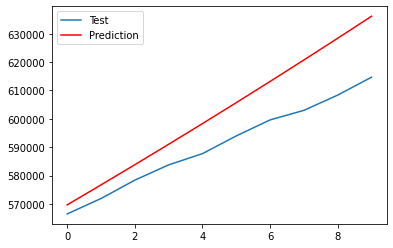

In [ ]:
d_log_test=[]
d_log_pre=[]
for i in test:
  d_log_test.append(math.exp(i))
for i in forecast:
  d_log_pre.append(math.exp(i))
import matplotlib.pyplot as plt
plt.plot(d_log_test,label='Test')
plt.plot(d_log_pre,label='Prediction',color='red')
plt.legend()
import numpy as np
pre=np.array(d_log_pre)
te=np.array(d_log_test)
print((((pre-te)**2).mean())**0.5)

In [ ]:
l=pd.DataFrame()
l['Date']=s['Kerala']['Date'][270:]
l['Confirmed']=s['Kerala']['Confirmed'][270:]
l['Predicted']=pre
l['Difference']=pre-te
l

,Date,Confirmed,Predicted,Difference
8994,2020-11-23,566453,569644.124461,3191.124461
9030,2020-11-24,571873,576678.043798,4805.043798
9066,2020-11-25,578364,583798.817399,5434.817399
9102,2020-11-26,583742,591007.517733,7265.517733
9138,2020-11-27,587708,598305.230513,10597.230513
9174,2020-11-28,593958,605693.054857,11735.054857
9210,2020-11-29,599601,613172.103456,13571.103456
9246,2020-11-30,602983,620743.502739,17760.502739
9282,2020-12-01,608358,628408.393044,20050.393044
9318,2020-12-02,614674,636167.928792,21493.928792


In [ ]:
RMS["ARIMA"]='1749.7621762132437'

In [ ]:
RMS['HES']='7719.831012515116'
RMS

{'AR': '3582.737051181442',
 'ARIMA': '1749.7621762132437',
 'HES': '7719.831012515116'}

In [ ]:

del RMS['AR(0)']

In [ ]:
RMS['AR']='3582.737051181442'

In [ ]:
RMS

{'AR': '3582.737051181442', 'ARIMA': '1749.7621762132437', 'HES': '7719.83'}

In [ ]:
RMS.keys()

dict_keys(['ARIMA', 'HES', 'AR'])

In [ ]:
kk=kk.append(RMS,ignore_index=True)

In [ ]:
kk.columns

Index(['AR', 'ARIMA', 'HES'], dtype='object')

In [ ]:
kk.values

array([['3582.737051181442', '1749.7621762132437', '7719.831012515116']],
      dtype=object)

<BarContainer object of 3 artists>

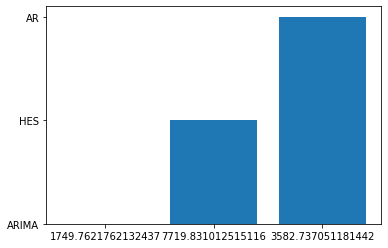

In [ ]:
plt.bar(RMS.values(),RMS.keys())

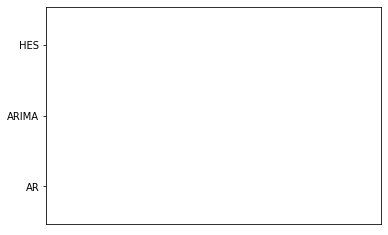

In [ ]:
fig, ax = plt.subplots()
model= ['AR', 'ARIMA', 'HES']
x_axis=['3582.737051181442', '1749.7621762132437', '7719.831012515116']
ax.set_xlim(xmin=1000, xmax=10000)
ax.barh(model,x_axis, align='center')
plt.show()

# Logistic

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
x=range(0,317)
s['Kerala']['No']=x
data=pd.DataFrame()
data=s['Kerala'][['No','Confirmed']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#defining logistic function
def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [ ]:
#assigning initial values randomly
p0 = np.random.exponential(size=3)
p0

array([0.64800804, 0.2811517 , 0.38382352])

In [ ]:
#defining the lower and upper limits
bounds = (0, [1000., 3., 3480000000.])

In [ ]:
#finding out the values for a,b,c
import scipy.optimize as optim
x = np.array(data['No']) + 1
y = np.array(data['Confirmed'])

(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)
a,b,c

(999.9999999999999, 0.026156641346139903, 1006438.8927539384)

In [ ]:
def my_logistic(t):
    return c / (1 + a * np.exp(-b*t))

Text(0, 0.5, 'Infections')

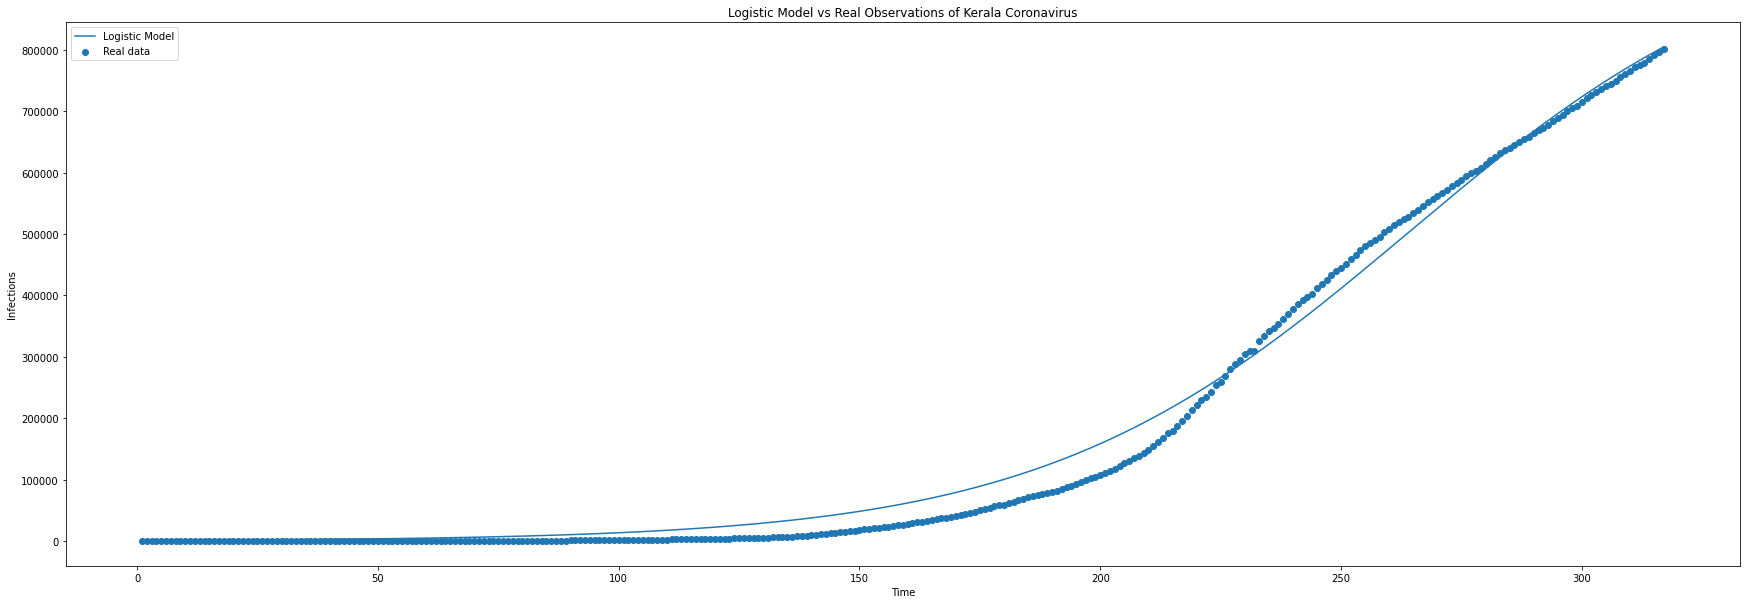

In [ ]:
#ploting predicted vs orginal
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(x, y)
plt.plot(x, my_logistic(x))
plt.title('Logistic Model vs Real Observations of Kerala Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')

In [ ]:
#defing dates for future prediction
z=pd.DataFrame()
z['No']=range(0,500)
zz=np.array(z['No'])

Text(0, 0.5, 'Infections')

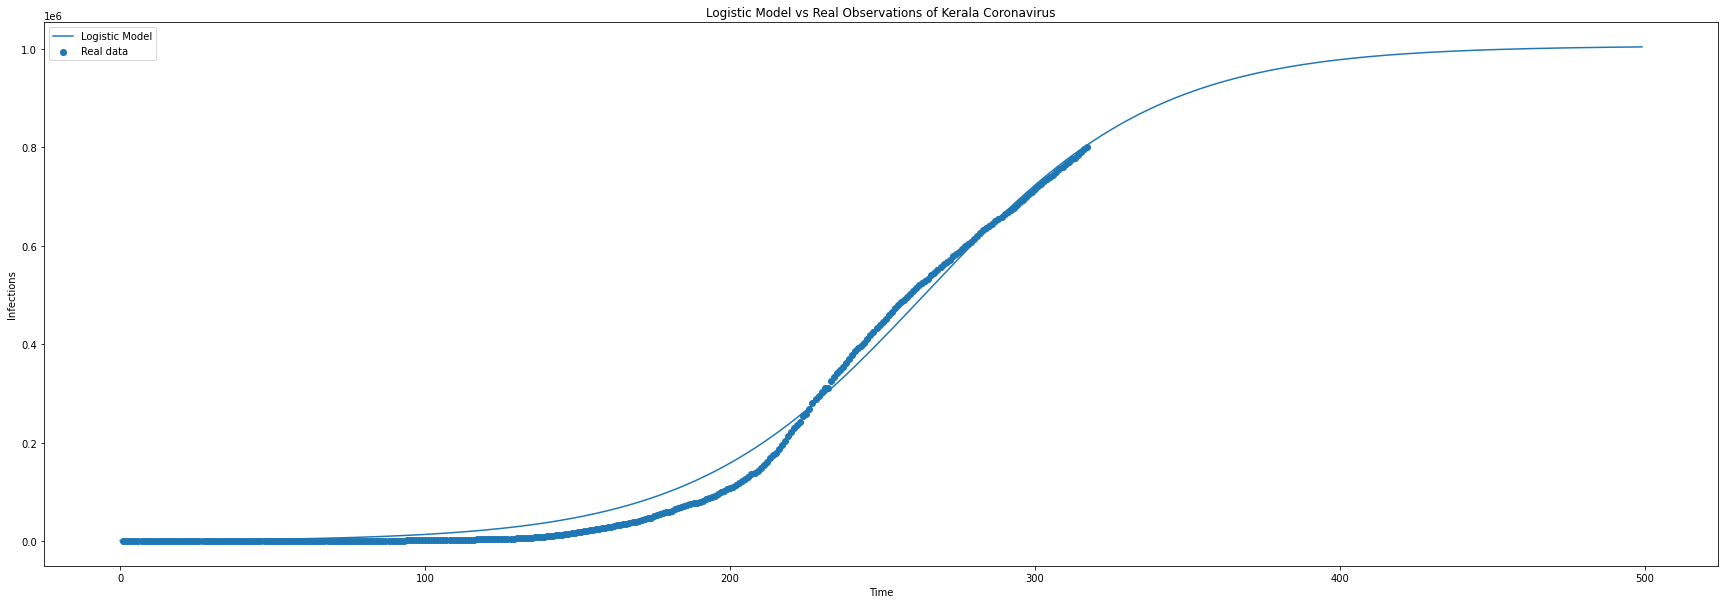

In [ ]:
#predicting future data
plt.figure(figsize=(30,10))
plt.scatter(x, y)
plt.plot(zz, my_logistic(zz))
plt.title('Logistic Model vs Real Observations of Kerala Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')

In [ ]:
#max value of confirmed cases
result=pd.DataFrame(my_logistic(zz))
result.max()

0    1.004284e+06
dtype: float64

In [ ]:
print((((my_logistic(x)-y)**2).mean())**0.5)

24144.020459540803


# ***FBPROPHET***

In [ ]:
from fbprophet import Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


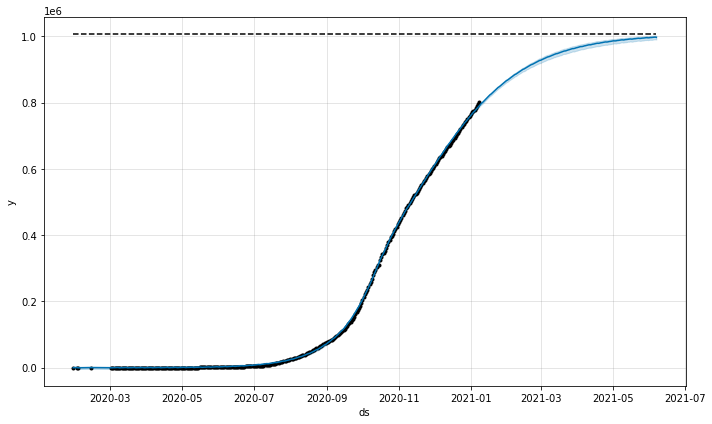

In [ ]:
confirmed=s["Kerala"].groupby("Date").sum()["Confirmed"].reset_index()
recovered=s["Kerala"].groupby("Date").sum()["Recovered"].reset_index()
deceased=s["Kerala"].groupby("Date").sum()["Deceased"].reset_index()

confirmed.columns=["ds","y"]
recovered.columns=["ds","y"]
deceased.columns=["ds","y"]

confirmed['cap']=1006438
m=Prophet(growth='logistic')
m.fit(confirmed)
f=m.make_future_dataframe(periods=150)
f['cap']=1006438
f=m.predict(f)
f[['ds','yhat']].iloc[-50:].max()

m.plot(f);

In [ ]:
f=m.predict(f)
f[['ds','yhat']].iloc[-150:].max()


ds      2021-06-07 00:00:00
yhat                 997457
dtype: object

In [ ]:
x=s['Kerala']['Confirmed'].reset_index()
y=f['yhat'].iloc[:]
y

0         -97.746709
1         424.605603
2        -414.185116
3         258.289351
4        -356.126144
           ...      
462    996285.633976
463    996843.372561
464    997187.656277
465    997456.623896
466    996824.494079
Name: yhat, Length: 467, dtype: float64

In [ ]:
y=f['yhat'].iloc[:317]
y

0         -97.746709
1         424.605603
2        -414.185116
3         258.289351
4        -356.126144
           ...      
312    773950.391514
313    778014.556492
314    782403.076143
315    786167.490769
316    790369.576400
Name: yhat, Length: 317, dtype: float64

In [ ]:
x['Confirmed'].iloc[-10:]-y.iloc[-10:]

307     2105.617805
308     3212.911699
309     3657.493911
310     4696.374589
311     5126.725922
312     4923.608486
313     6474.443508
314     8479.923857
315     9766.509231
316    10706.423600
dtype: float64

In [ ]:
print((((x['Confirmed'].iloc[-10:]-y.iloc[-10:])**2).mean())**0.5)

6515.785442558983
